<a href="https://colab.research.google.com/github/Sandramcrs08/Probabilidade_e_Amostragem/blob/main/Probabilidade_e_Amostragem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Challenge Probabilidade e Amostragem


> Squad: Marie Currie



In [ ]:
##Bibliotecas utilizadas
### para manipulação dos dados em python
import pandas as pd
import numpy as np

### Para visualizaçaõ dos dados
import seaborn as sns
import matplotlib.pyplot as plt

#O módulo stats da biblioteca Scipy contém uma ampla variedade de funções e classes relacionadas a estatísticas e distribuições de probabilidade.
from scipy import stats

In [ ]:
##Importando os arquivos
df = pd.read_csv('desafio01consumidor.csv')
df.head(5)


,id_cliente,idade,renda,produto,regiao-BR,pre-pandemia
0,XXXXXXX72,30,7452,batom,Sudeste,1
1,XXXXXXX15,59,837,desodorante,Nordeste,1
2,XXXXXXX70,28,3231,sombra,Centro-Oeste,1
3,XXXXXXX99,27,5409,batom,Sul,1
4,XXXXXXX98,24,1142,batom,Sudeste,1


##Desafio 1: Entendendo o consumidor.

Questão 1: Entenda a distribuição de variáveis como de idade / renda / regiao /
produtos mais comprados antes e depois da pandemia
a. Identifique as distribuições
b. Plote histogramas / boxplots

Identificando a distribuição das variáveis

In [ ]:
#criando o campo faixa etária no data frame
#primeiro definir os limites das faixas(bins)
lim_faixas = [15,20,25,30, 35,40, 45,50, 55,60, 65,70,75,80, 100]

#Definir rótulos para as faixas
rot_faixas= ['15 a 19 anos','20 a 24 anos','25 a 29 anos','30 a 34 anos','35 a 39 anos','40 a 44 anos','45 a 49 anos','50 a 54 anos','55 a 59 anos','60 a 64 anos','65 a 69 anos','70 a 74 anos','75 a 79 anos','80 anos ou mais']

#agora vamos criar as faixas usando a função pd.cut()
#esta função divide um array de valores em interavlos discretos e atribui rótulos a cada intervalo.
df['faixa etária'] = pd.cut(df['idade'], bins=lim_faixas, labels=rot_faixas, right=False)


In [ ]:
#criar um dataframe com os dados pré pandemia
df_pre = df[df['pre-pandemia'] == 1]

#criar um dataframe com os dados pós pandemia
df_pos = df[df['pre-pandemia'] == 0]

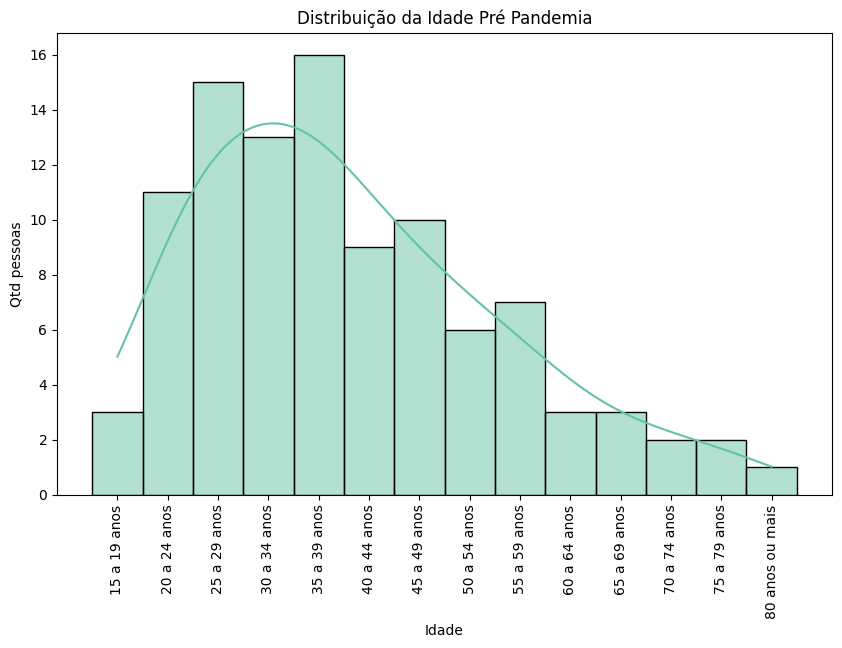

In [ ]:
# Visualizar a distribuição da idade pré pandemia
plt.figure(figsize=(10, 6))
sns.set_palette('Set2')
sns.histplot(df_pre['faixa etária'],bins=20, kde=True)
plt.title('Distribuição da Idade Pré Pandemia')
plt.xlabel('Idade')
plt.ylabel('Qtd pessoas')
plt.xticks(rotation=90)
plt.show()


Identificamos uma cauda alongada à direita na distribuição das idades antes da pandemia. Essa distribuição significa que a maior parte das pessoas tem sua idade concentrada entre 20 a 49 anos.

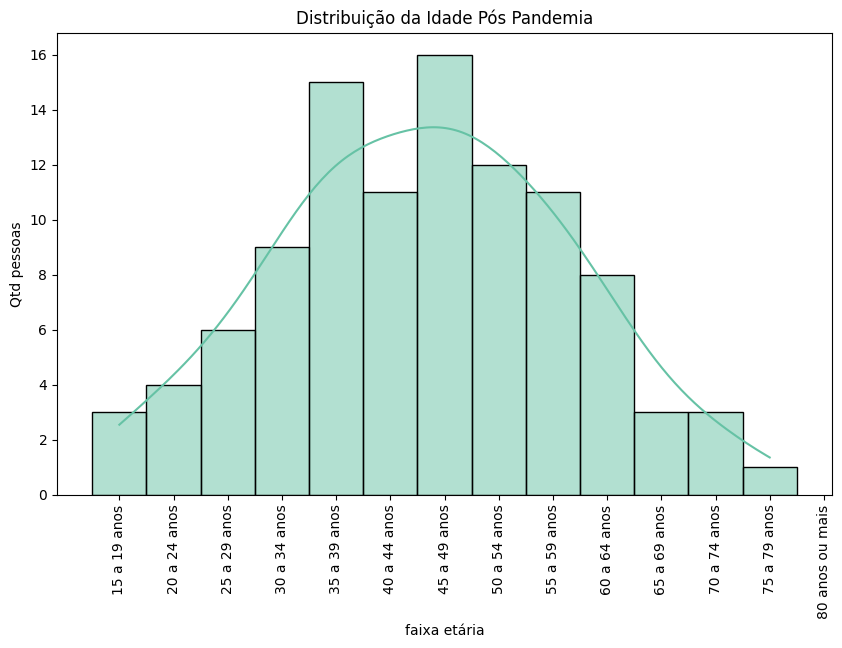

In [ ]:
# Visualizar a distribuição da idade no pós pandemia
plt.figure(figsize=(10, 6))
sns.set_palette('Set2')
sns.histplot(df_pos['faixa etária'],bins=20, kde=True)
plt.title('Distribuição da Idade Pós Pandemia')
plt.xlabel('faixa etária')
plt.ylabel('Qtd pessoas')
plt.xticks(rotation=90)
plt.show()


Na amostra das idades no pós pandemia, identificamos uma distribuição simétrica. Para essa amostra, significa que a maioria das pessoas tem suas idades concentradas de 25 até 64 anos.

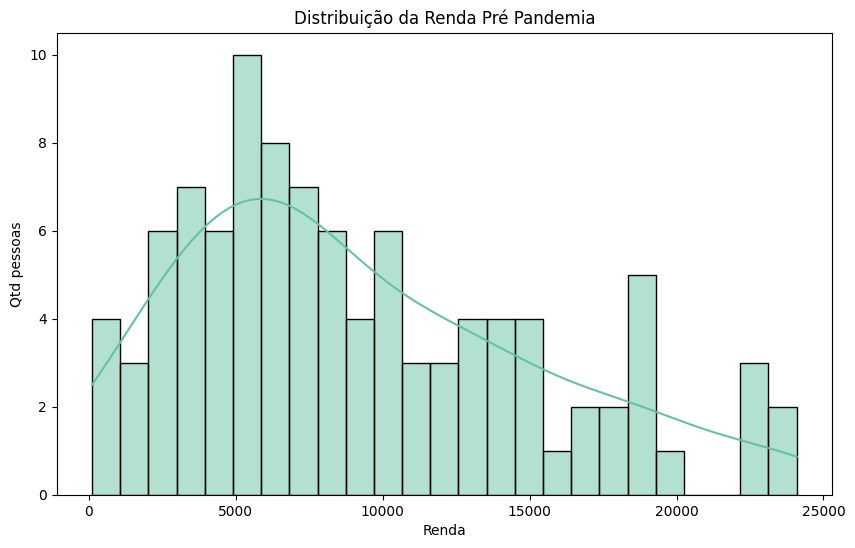

In [ ]:
# Visualizar a distribuição da renda no pré pandemia
plt.figure(figsize=(10, 6))
sns.set_palette('Set2')
sns.histplot(df_pre['renda'],bins=25, kde=True)
plt.title('Distribuição da Renda Pré Pandemia')
plt.xlabel('Renda')
plt.ylabel('Qtd pessoas')
plt.show()

Na distribuição da renda no período pré pandemia, identificamos uma cauda alongada à direita. Essa distribuição significa que a maior parte das pessoas tem a renda de 3.000 a 15.000.

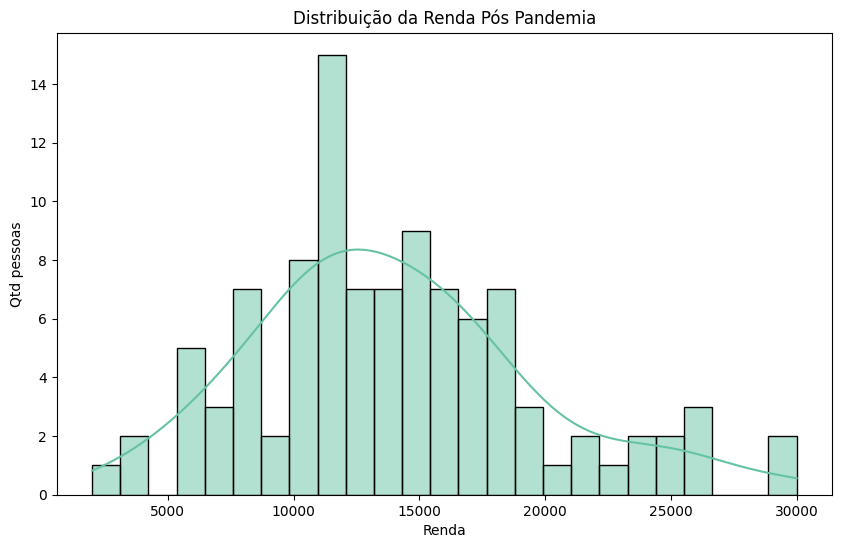

In [ ]:
# Visualizar a distribuição da renda no pós pandemia
plt.figure(figsize=(10, 6))
sns.set_palette('Set2')
sns.histplot(df_pos['renda'],bins=25, kde=True)
plt.title('Distribuição da Renda Pós Pandemia')
plt.xlabel('Renda')
plt.ylabel('Qtd pessoas')
plt.show()

No período pós pandemia, identificamos uma distribuição de renda mais simétrica que antes da pandemia, mas com uma cauda um pouco mais alongada à direita. Identificamos que a maioria das pessoas da amostra, possui uma renda de 5.000 19.000.

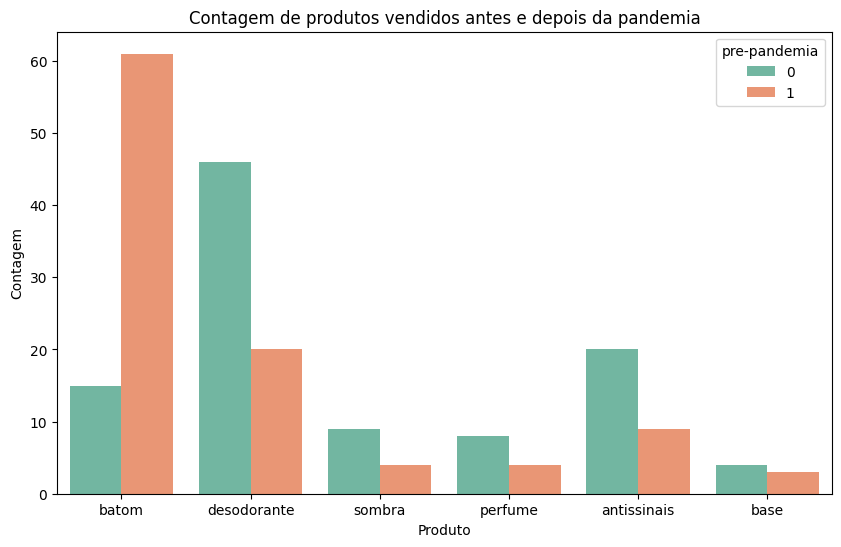

In [ ]:
##Gráfico de barras para comparar as vendas pré e pós pandemia.
plt.figure(figsize=(10, 6))
# Plotar o countplot
sns.countplot(data=df, x='produto', hue='pre-pandemia', palette='Set2')


# Adicionar rótulos e título
plt.xlabel('Produto')
plt.ylabel('Contagem')
plt.title('Contagem de produtos vendidos antes e depois da pandemia')

# Exibir o gráfico
plt.show()

Identificamos que o produto mais vendido antes da pandemia foi o batom. O produto mais vendido depois da pandemia foi o desodorante.

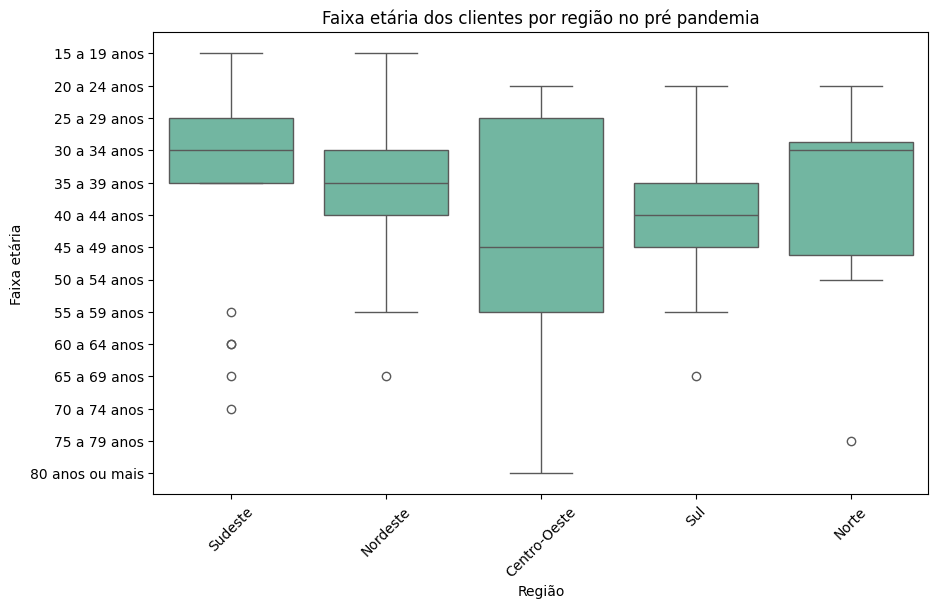

In [ ]:
#analisar a faixa etária dos clientes X região no pré pandemia
sns.set_palette('Set2')
plt.figure(figsize=(10, 6))
sns.boxplot(x='regiao-BR', y='faixa etária', data=df_pre,showfliers=True)
plt.title('Faixa etária dos clientes por região no pré pandemia')
plt.xlabel('Região')
plt.ylabel('Faixa etária')
plt.xticks(rotation=45)
plt.show()

Identificamos que no pré pandemia a região Centro-Oeste concentra a maior quantidade de faixas etárias, de '20 a 24 anos' até '80 anos ou mais'.
A região que concentra menos faixas etárias é a Sudeste: de '15 a 29 anos' até '35 a 39 anos', desconsiderando os outliers.

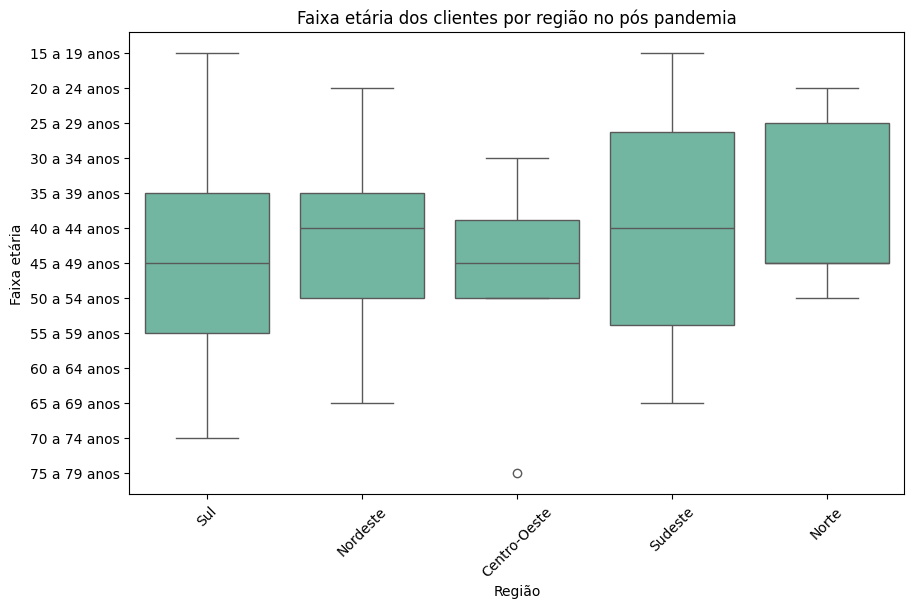

In [ ]:
#analisar a faixa etária dos clientes X região no pós pandemia
sns.set_palette('Set2')
plt.figure(figsize=(10, 6))
sns.boxplot(x='regiao-BR', y='faixa etária', data=df_pos,showfliers=True)
plt.title('Faixa etária dos clientes por região no pós pandemia')
plt.xlabel('Região')
plt.ylabel('Faixa etária')
plt.xticks(rotation=45)
plt.show()

Após a pandemia o cenário mudou. A região com maior concentração de faixas etárias passou a ser a região sudeste: De: '20 a 24 anos' até '65 a 69 anos'.
A região que passou a ter menor concentração de faixas etárias foi a Centro-Oeste: De: '30 a 34 anos' até '50 a 54 anos', desconsiderando os outliers.

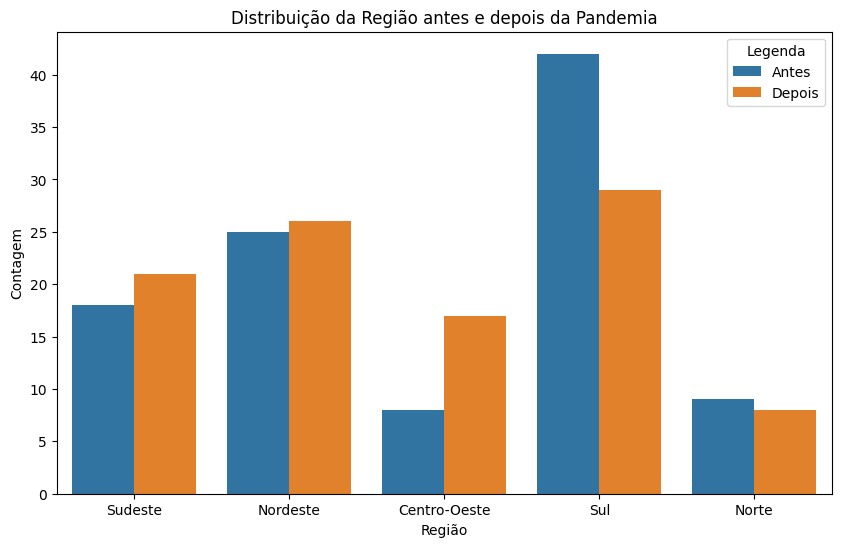

In [ ]:
# Comparação de região antes e depois da pandemia (Ju)
plt.figure(figsize=(10, 6))
sns.countplot(x='regiao-BR', hue='pre-pandemia', data=df)
plt.title('Distribuição da Região antes e depois da Pandemia')
plt.xlabel('Região')
plt.ylabel('Contagem')
plt.legend(title='Legenda', labels=['Antes', 'Depois'])
plt.show()

**Questão 2:** Você notou diferenças nítidas pré e pós pandemia? Como você poderia
provar estatisticamente que essas diferenças são significativas ? (pergunta
extra)


In [ ]:
#Comparar a probabilidade de um cliente comprar o produto batom antes e depois da pandemia
#Filtrar no dataframe os registros pré e pós pandemia
df_pos = df[df['pre-pandemia'] == 0]
df_pre = df[df['pre-pandemia'] == 1]

#contar a quantidade de vendas para cada um dos períodos pré e pós pandemia
qtd_total_pos = len(df_pos)
qtd_total_pre = len(df_pre)

#contar a quantidade de batons vendidos nos períodos pré e pós pandemia.
qtd_batom_pos = (df_pos['produto'] == 'batom').sum()
qtd_batom_pre = (df_pre['produto'] == 'batom').sum()

#Calcular a probabilidade de vendas do produto batom para os períodos pré e pós pandemia
prob_batom_pre = qtd_batom_pre/qtd_total_pre
prob_batom_pos = qtd_batom_pos/qtd_total_pos


print(f'A probabilidade de uma pessoa comprar batom antes da pandemia é {prob_batom_pre} e depois da pandemia é {prob_batom_pos}.')
print(f'A diferença entre as probabilidades de uma pessoa comprar batom antes e depois da pandemia é {abs(prob_batom_pos-prob_batom_pre)}, portanto notamos uma diferença no comportamento de compra após a pandemia.')

A probabilidade de uma pessoa comprar batom antes da pandemia é 0.6039603960396039 e depois da pandemia é 0.14705882352941177.
A diferença entre as probabilidades de uma pessoa comprar batom antes e depois da pandemia é 0.45690157251019214, portanto notamos uma diferença no comportamento de compra após a pandemia.


In [ ]:
#Executar o T-student para verificar se há diferenças estatíticas significativas entre as rendas da região Sudeste comparando amostras dos períodos antes e depois da pandemia.
from scipy.stats import ttest_ind
#Criar um data frame para as amostras de renda na região sudeste, antes e depois da pandemia.
amostra_sudeste_antes = df_pre[df_pre['regiao-BR'] == 'Sudeste']['renda']
amostra_sudeste_depois = df_pos[df_pos['regiao-BR'] == 'Sudeste']['renda']

# Executar o teste t de Student. Este teste é utilizado para determinar se há uma diferença significativa entre as médias de duas amostras independentes.
t_statistic, p_value = ttest_ind(amostra_sudeste_antes, amostra_sudeste_depois)

# Exibir os resultados
print('Estatística t:', t_statistic)
print('Valor p:', p_value)

if(p_value < 0.05):
  print('O Valor p é singificativamente baixo. Isso indica que as diferenças entre as médias de renda entre as duas regiões são estatisticamente significativas. Houve alteração na renda média após a pandemia.')
else:
  print('Não podemos concluir que há uma diferença estatisticamente significativa entre as médias das rendas na região Sudeste, considerando as amostras antes e depois da pandemia.')

Estatística t: -3.629116271141076
Valor p: 0.0008542582407251303
O Valor p é singificativamente baixo. Isso indica que as diferenças entre as médias de renda entre as duas regiões são estatisticamente significativas. Houve alteração na renda média após a pandemia.


Questão 3 = Suponha agora que os dados recebidos são somente uma amostra da sua população total de clientes. Suponha que a sua "população" de clientes verdadeira é de 100000. Qual o tamanho da amostra necessária para chegarmos a conclusões com 95% de confiança e 2% de margem de erro? A base informada é suficiente? E com uma margem de erro de 10%?

In [ ]:
import math

def tamanho_amostra(margem_erro, confianca=0.95, proporcao=0.5):

    # Calcular o valor z correspondente ao nível de confiança
    z = 1.96  # para 95% de confiança

    # Calcular o tamanho da amostra
    n = (z**2 * proporcao * (1 - proporcao)) / (margem_erro**2)

    return math.ceil(n)  # Arredondar para cima para garantir um tamanho de amostra inteiro

# Tamanho da amostra para uma margem de erro de 2% e 10% com 95% de confiança

tamanho_amostra_2_porcento = tamanho_amostra(0.02)
tamanho_amostra_10_porcento = tamanho_amostra(0.1)

print("Tamanho da amostra necessário para uma margem de erro de 2%:", tamanho_amostra_2_porcento)
print("Tamanho da amostra necessário para uma margem de erro de 10%:", tamanho_amostra_10_porcento)

Tamanho da amostra necessário para uma margem de erro de 2%: 2401
Tamanho da amostra necessário para uma margem de erro de 10%: 97


### Comentário de Sandra
### Para atingir um nível de confiança de 95% e uma margem de erro de 2%, precisamos de um tamanho de amostra de pelo menos 2401. Para atingir um nível de confiança de 95% e uma margem de erro de 10%, precisamos de um tamanho de amostra de pelo menos 97.


In [ ]:
# Tamanho da amostra atual
tamanho_amostra_atual = len('desafio01consumidor.csv')

# Comparar com o tamanho da amostra necessário
if tamanho_amostra_atual >= tamanho_amostra_2_porcento:
    print("A base informada é suficiente para uma margem de erro de 2% e 95% de confiança.")
else:
    print("A base informada não é suficiente para uma margem de erro de 2% e 95% de confiança.")

if tamanho_amostra_atual >= tamanho_amostra_10_porcento:
    print("A base informada é suficiente para uma margem de erro de 10% e 95% de confiança.")
else:
    print("A base informada não é suficiente para uma margem de erro de 10% e 95% de confiança.")




A base informada não é suficiente para uma margem de erro de 2% e 95% de confiança.
A base informada não é suficiente para uma margem de erro de 10% e 95% de confiança.


## Desafio 2
### O gerente de vendas te enviou o arquivo *desafio_02_estoque*.csv contendo os dados de vendas de iogurte e o lead time de 2015 a 2022.

In [ ]:
# Importando o arquivo
df_estoque = pd.read_csv('desafio_02_estoque.csv')
df_estoque.head(5)

,data,vendas-iogurte,lead-time
0,2015-01-04,5083,4
1,2015-01-11,4936,3
2,2015-01-18,5051,6
3,2015-01-25,4846,4
4,2015-02-01,5003,5


**Questão 1:** Analise os dados das vendas e do lead time. Eles seguem uma distribuição normal? <br>
Que características você identificou para chegar a essa conclusão?

In [ ]:
# Verificando as métricas
df_estoque.describe()

,vendas-iogurte,lead-time
count,370.000000,370.000000
mean,4999.170270,5.094595
std,77.285068,1.578728
min,4811.000000,1.000000
25%,4947.000000,4.000000
50%,4996.000000,5.000000
75%,5054.000000,6.000000
max,5233.000000,9.000000


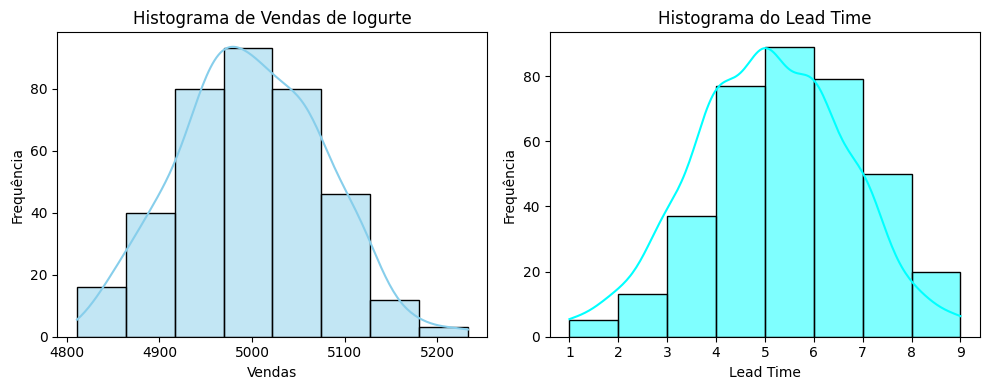

In [ ]:
# Plotando histograma para visualizar a distribuição dos dados de venda
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df_estoque['vendas-iogurte'], bins=8, color='skyblue', edgecolor='black', kde=True)
plt.title('Histograma de Vendas de Iogurte')
plt.xlabel('Vendas')
plt.ylabel('Frequência')

# Plotando histograma do lead time para verificar a distribuição dos dados do time
plt.subplot(1, 2, 2)
sns.histplot(df_estoque['lead-time'], bins=8, color='cyan', edgecolor='black', kde=True)
plt.title('Histograma do Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

Conclusão: <br>
Histograma de Vendas de Iogurte:<br>
Distribuição unimodal e simétrica, com a maioria das vendas concentrada no centro.<br><br>
Histograma do Lead Time:<br>
Distribuição assimétrica à direita, com "cauda" mais longa para valores maiores.

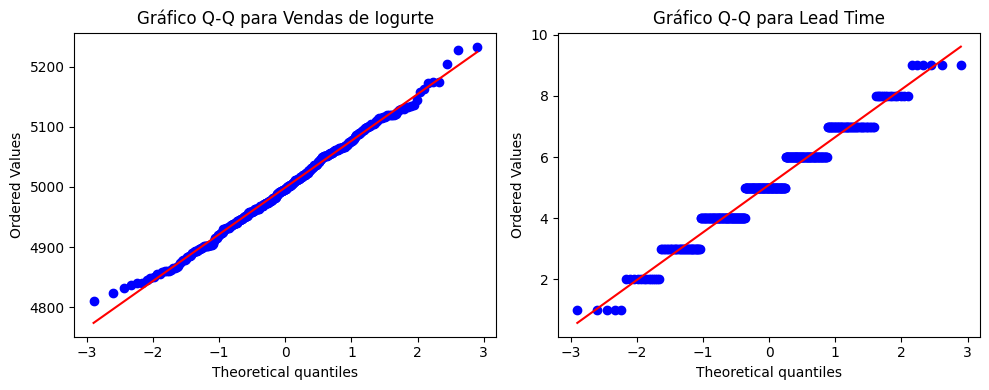

In [ ]:
# Gráfico Q-Q para vendas
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
stats.probplot(df_estoque['vendas-iogurte'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q para Vendas de Iogurte')

# Gráfico Q-Q para lead time
plt.subplot(1, 2, 2)
stats.probplot(df_estoque['lead-time'], dist="norm", plot=plt)
plt.title('Gráfico Q-Q para Lead Time')

plt.tight_layout()
plt.show()

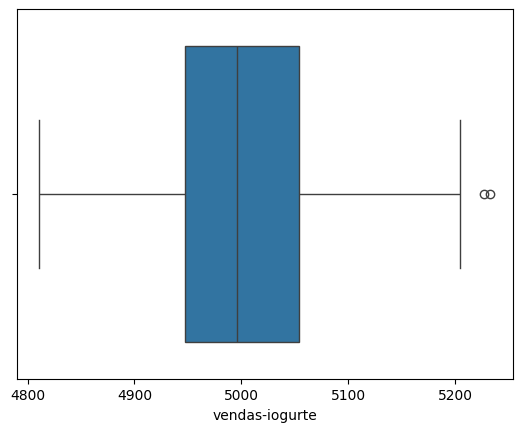

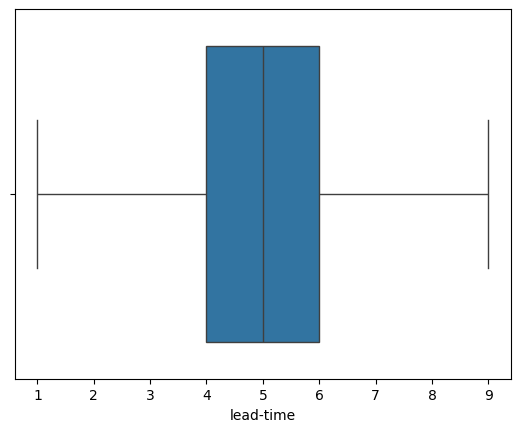

In [ ]:
# identificado outliers
# Criando boxplot para coluna vendas
sns.boxplot(df_estoque, x="vendas-iogurte")
plt.show()

# Criando boxplot para coluna lead-time
sns.boxplot(df_estoque, x="lead-time")
plt.show()

### Conclusão: <br>

As vendas de iogurte apresentam uma distribuição aproximadamente normal, com algumas assimetrias e com a maioria das vendas concentrada em torno da média.
<br>
O lead time apresenta uma distribuição assimétrica à direita, com valores mais concentrados no início do intervalo.


**Questão 2:** Calcule, com os dados fornecidos, o estoque de segurança desejado

Assuma que:

a. Os dados seguem uma distribuição normal.

b. O time de vendas utilize para o produto em questão o nível de serviço
de 99,87%

c. O produto não tem sazonalidade (todos os meses vende valores
próximos) e a demanda média passada é uma boa estimativa para a
projetada, de acordo com o time de planejamento de demanda.

In [ ]:
import scipy.stats as st

def calcular_estoque_seguranca(demanda_media, desvio_padrao, nivel_servico):
    # Encontrar o valor z correspondente ao nível de serviço desejado
    z = st.norm.ppf(nivel_servico)

    # Calcular o estoque de segurança
    estoque_seguranca = z * desvio_padrao

    return estoque_seguranca

# Dados fornecidos:
demanda_media = 1000  # Demanda média
desvio_padrao = 100  # Desvio padrão da demanda
nivel_servico = 0.9987  # Nível de serviço desejado (99,87%)

# Calcular o estoque de segurança
estoque_seguranca = calcular_estoque_seguranca(demanda_media, desvio_padrao, nivel_servico)

print("O estoque de segurança desejado é:", estoque_seguranca)

O estoque de segurança desejado é: 301.1453758499792
